In [49]:
# import numpy as np
# import matplotlib.pyplot as plt
# 
# x = ["2/255", "4/255", "6/255", "8/255", "16/255", "32/255"]
# y1 = [77.33, 77.37, 77.30, None, 77.26, 77.36]
# y2 = [77, 76.3, 76, 75.8, 75.5, 75.6]
# 
# plt.title("Segmentation accuracy for increasing attack noise")
# plt.xlabel("Attack radius")
# plt.ylabel("Segmentation accuracy")
# plt.plot(x, y1, marker="^")
# plt.plot(x, y2, marker="o")
# plt.legend(["DDS", "VTA"])
# plt.show()

# Perturbations

In [50]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
# get a list of directories under baselines/ViT/experiments/perturbations
path = 'FViT-main/baselines/ViT/experiments/perturbations/'
all_directories = os.listdir(path)
if '.DS_Store' in all_directories:
    all_directories.remove('.DS_Store')
pos_directories = sorted([d for d in all_directories if 'pos' in d])
neg_directories = sorted([d for d in all_directories if 'neg' in d])
print(all_directories)
# print(pos_directories)
# print(neg_directories)

['attr_rollout_neg_32.0_dds', 'attr_rollout_neg_0.0', 'rollout_pos_0.0', 'rollout_pos_24.0', 'attn_last_layer_neg_0.0', 'attr_rollout_neg_16.0_dds', 'rollout_neg_32.0', 'transformer_attribution_pos_0.0', 'attn_last_layer_pos_16.0', 'transformer_attribution_neg_0.0_dds', 'transformer_attribution_neg_0.0', 'attr_rollout_neg_24.0', 'transformer_attribution_pos_0.0_dds', 'attn_last_layer_pos_0.0', 'transformer_attribution_neg_32.0_dds', 'rollout_neg_0.0', 'transformer_attribution_neg_16.0_dds', 'attr_rollout_pos_0.0', 'transformer_attribution_pos_16.0', 'attr_rollout_pos_32.0', 'attr_rollout_neg_16.0', 'transformer_attribution_neg_32.0', 'attn_last_layer_pos_24.0', 'attr_rollout_pos_16.0_dds', 'transformer_attribution_pos_24.0', 'attn_last_layer_neg_32.0', 'attr_rollout_pos_32.0_dds', 'transformer_attribution_pos_16.0_dds', 'rollout_pos_16.0', 'transformer_attribution_pos_32.0_dds', 'attr_rollout_pos_8.0_dds', 'attr_rollout_neg_8.0_dds', 'attn_last_layer_neg_8.0', 'attr_rollout_neg_32.0', 

In [61]:
path = 'FViT-main/baselines/ViT/experiments/perturbations/'
# dataframe with columns path, method, type, dds, noise
df = pd.DataFrame(columns=['path', 'Method', 'type', 'DDS', 'noise', "auc", "perturbations_hits"])
for dir in all_directories:
    if dir == "unusables":
        continue
    
    # method is the part before "_neg" or "_pos"
    parts = dir.split("_")
    method = ""
    for part in parts:
        if part == 'neg' or part == 'pos':
            break
        method += part + "_"
    method = method[:-1]
    
    pert_type = "pos" if "pos" in dir else "neg"
    
    # dds = "DDS" if "dds" in dir else "No DDS"
    dds = "With" if "dds" in dir else "Without"
    
    noise = float(parts[-1]) if parts[-1] != "dds" else float(parts[-2])
    
    npy_path = os.path.join(path, dir)
    ls = os.listdir(npy_path)
    
    # top
    npy_path = os.path.join(npy_path, [l for l in ls if l.startswith("top")][0])
    npy_path = os.path.join(npy_path, "not_ablation")
    ls = os.listdir(npy_path)
    # get the directory with the highest number
    npy_path = os.path.join(npy_path, sorted(ls)[-1])
    
    perturbations_hits = os.path.join(npy_path, "perturbations_hits.npy")
    perturbations_hits = np.mean(np.load(perturbations_hits), 1)
    auc = np.trapz(perturbations_hits) / 8
    
    # add to df
    df_new_row = pd.DataFrame([[npy_path, method, pert_type, dds, noise, auc, perturbations_hits]], columns=['path', 'Method', 'type', 'DDS', 'noise', 'auc', 'perturbations_hits'])
    df = pd.concat([df, df_new_row], ignore_index=True)

In [62]:
# generate a table from df
# save df to csv
df.to_csv('perturbations.csv', index=False)
# save to pandas
df.to_pickle('perturbations.pkl')

In [63]:
df.head()

,path,Method,type,DDS,noise,auc,perturbations_hits
0,FViT-main/baselines/ViT/experiments/perturbati...,attr_rollout,neg,With,32.0,0.580078,"[0.7805, 0.76025, 0.73175, 0.684, 0.643, 0.579..."
1,FViT-main/baselines/ViT/experiments/perturbati...,attr_rollout,neg,Without,0.0,0.602266,"[0.787, 0.77075, 0.75675, 0.71875, 0.6745, 0.5..."
2,FViT-main/baselines/ViT/experiments/perturbati...,rollout,pos,Without,0.0,0.147828,"[0.51675, 0.3535, 0.2475, 0.152, 0.088, 0.0457..."
3,FViT-main/baselines/ViT/experiments/perturbati...,rollout,pos,Without,24.0,0.226812,"[0.6485, 0.50075, 0.3755, 0.26725, 0.1745, 0.1..."
4,FViT-main/baselines/ViT/experiments/perturbati...,attn_last_layer,neg,Without,0.0,0.476906,"[0.7815, 0.747, 0.6985, 0.63325, 0.52725, 0.41..."


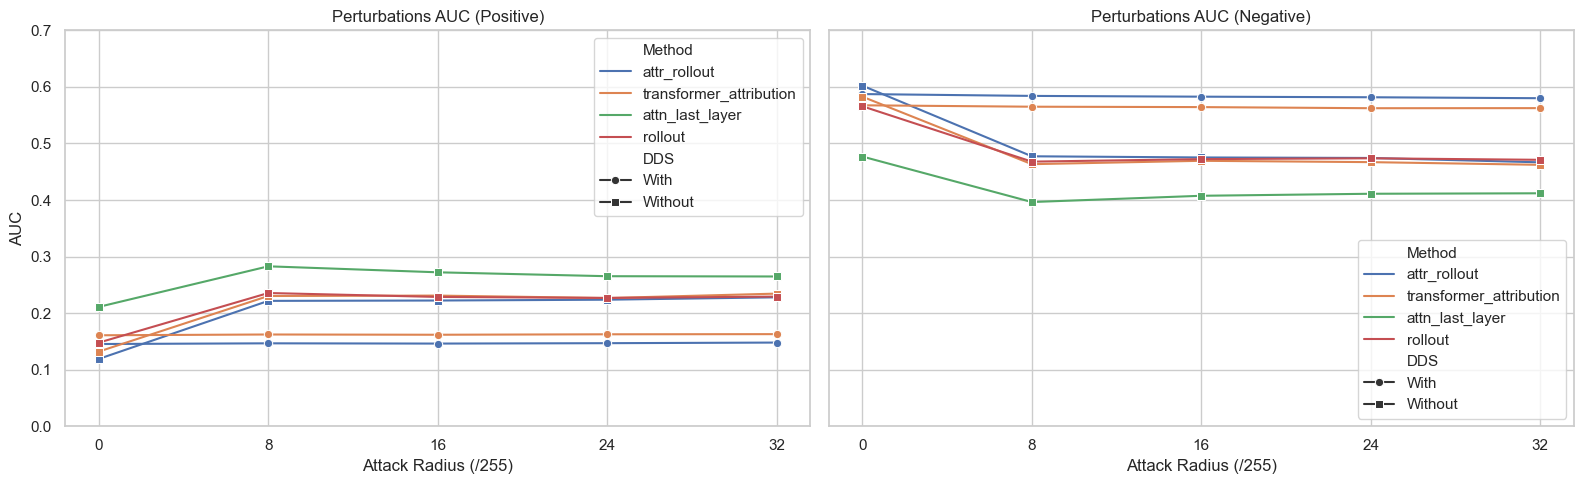

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#sort df by DDS
df = df.sort_values(by=['DDS', 'Method', 'noise'])


# Set style
sns.set(style="whitegrid")

# Create a single figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Plot 'pos' data
sns.lineplot(
    data=df[df['type'] == 'pos'], 
    x='noise', 
    y='auc', 
    hue='Method', 
    style='DDS', 
    markers=["o", "s"], 
    dashes=False, 
    ax=axes[0]
)
axes[0].set_ylim(0, 0.7)
axes[0].set_xticks(np.arange(0, 33, 8))
axes[0].set_xlabel("Attack Radius (/255)")
axes[0].set_ylabel("AUC")
axes[0].set_title("Perturbations AUC (Positive)")
axes[0].legend()

# Plot 'neg' data
sns.lineplot(
    data=df[df['type'] == 'neg'], 
    x='noise', 
    y='auc', 
    hue='Method', 
    style='DDS', 
    markers=["o", "s"], 
    dashes=False, 
    ax=axes[1]
)
axes[1].set_ylim(0, 0.7)
axes[1].set_xticks(np.arange(0, 33, 8))
axes[1].set_xlabel("Attack Radius (/255)")
axes[1].set_title("Perturbations AUC (Negative)")
axes[1].legend(loc='lower right', bbox_to_anchor=(1, 0))

# Adjust layout
plt.tight_layout()
plt.show()

In [55]:
df_expanded = pd.DataFrame(columns=['path', 'Method', 'type', 'DDS', 'noise', "auc", "perturbations_hits", "perturbation_level"])
# expand perturbations_hits npyarray into perturbation_hits and perturbation_level
# The perturbation_levels are 0.1, 0.2, 0.3, ..., 0.9
for index, row in df.iterrows():
    # get the perturbations_hits
    perturbations_hits = row['perturbations_hits']
    # get the perturbation levels
    perturbation_levels = [0.1 * i for i in range(1, 10)]
    # create a new dataframe with the same columns as df
    for i in range(len(perturbations_hits)):
        df_expanded = pd.concat([df_expanded, pd.DataFrame([[row['path'], row['Method'], row['type'], row['DDS'], row['noise'], row['auc'], perturbations_hits[i], perturbation_levels[i]]], columns=['path', 'Method', 'type', 'DDS', 'noise', 'auc', 'perturbations_hits', 'perturbation_level'])], ignore_index=True)

In [56]:
df_expanded.head()

,path,Method,type,DDS,noise,auc,perturbations_hits,perturbation_level
0,FViT-main/baselines/ViT/experiments/perturbati...,attr_rollout,neg,1,32.0,0.580078,0.78050,0.1
1,FViT-main/baselines/ViT/experiments/perturbati...,attr_rollout,neg,1,32.0,0.580078,0.76025,0.2
2,FViT-main/baselines/ViT/experiments/perturbati...,attr_rollout,neg,1,32.0,0.580078,0.73175,0.3
3,FViT-main/baselines/ViT/experiments/perturbati...,attr_rollout,neg,1,32.0,0.580078,0.68400,0.4
4,FViT-main/baselines/ViT/experiments/perturbati...,attr_rollout,neg,1,32.0,0.580078,0.64300,0.5


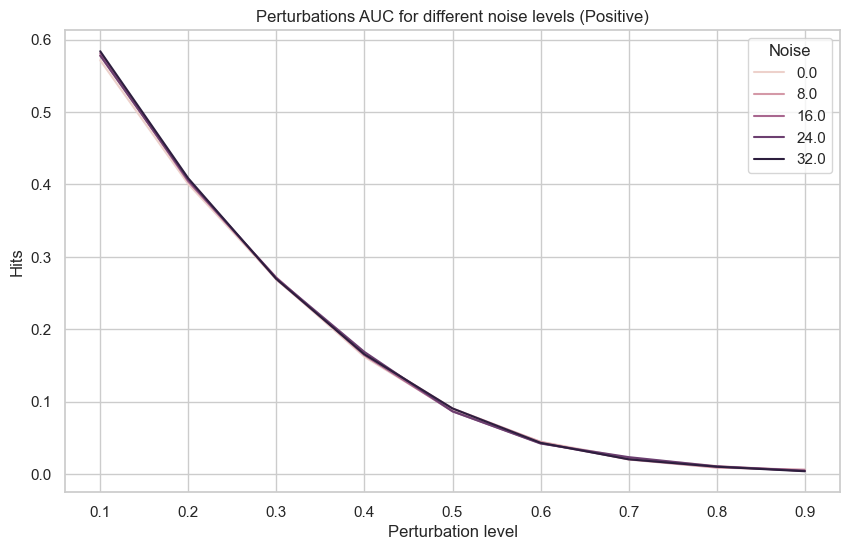

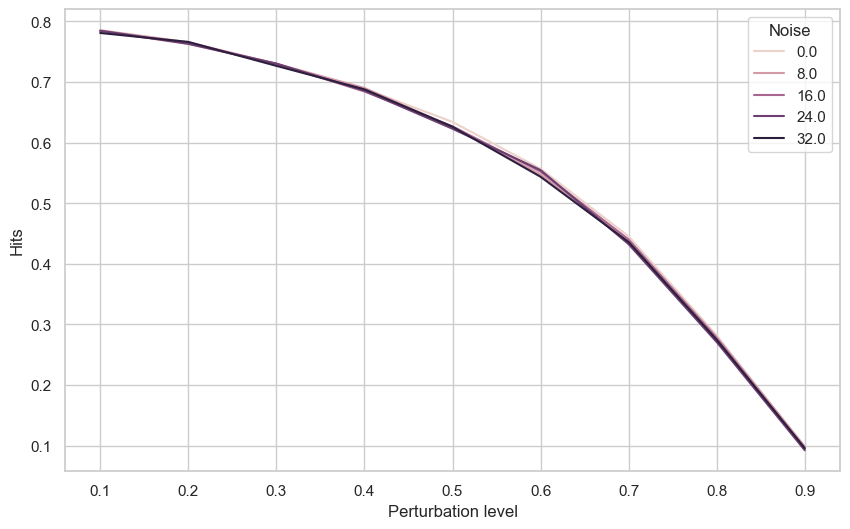

In [57]:
sns.set(style="whitegrid")

# Plot 'pos' data
plt.figure(figsize=(10, 6))
sns.lineplot(data = df_expanded[(df_expanded['type'] == 'pos') & (df_expanded["Method"] == "transformer_attribution") & (df_expanded["DDS"] == 1)], x='perturbation_level', y='perturbations_hits', hue='noise', dashes=False)
plt.title("Perturbations AUC for different noise levels (Positive)")
plt.xlabel("Perturbation level")
plt.ylabel("Hits")
plt.legend(title='Noise')
plt.show()

# Plot 'neg' data
plt.figure(figsize=(10, 6))
sns.lineplot(data = df_expanded[(df_expanded['type'] == 'neg') & (df_expanded["Method"] == "transformer_attribution") & (df_expanded["DDS"] == 1)], x='perturbation_level', y='perturbations_hits', hue='noise', dashes=False)
plt.xlabel("Perturbation level")
plt.ylabel("Hits")
plt.legend(title='Noise')
plt.show()

In [58]:
sub_path_prefix = 'top/not_ablation/experiment_0'
all_files = {}
for directory in all_directories:
    subpath = os.path.join(path, directory, sub_path_prefix)
    directory_files_content = {}
    for file in os.listdir(subpath):
        file_path = os.path.join(subpath, file)
        if file[-3:] == 'npy':
            directory_files_content[file] = np.load(file_path)
        all_files[directory] = directory_files_content


FileNotFoundError: [Errno 2] No such file or directory: 'FViT-main/baselines/ViT/experiments/perturbations/rollout_pos_24.0/top/not_ablation/experiment_0'

In [ ]:
unique_filenames = set()
for directory in all_files:
    for file in all_files[directory]:
        unique_filenames.add(file)
print(unique_filenames)

In [ ]:
for u_name in unique_filenames:
    for directory in all_files:
        if u_name in all_files[directory]:
            data = all_files[directory][u_name]
            print(directory, u_name, data.shape)

In [ ]:
data = all_files['dds_pos']['model_dissimilarities.npy']
print(data)

In [ ]:
type = 'pos'
x_axis = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for u_name in unique_filenames:
    if u_name in ['model_hits.npy', 'model_dissimilarities.npy']:
        continue
    # line plot of all files, labeled by the directory name
    fig, ax = plt.subplots()
    plt.title(u_name)
    # set image size
    fig.set_size_inches(5, 3)
    # plt.xlabel("Epoch")
    # plt.ylabel("Value")
    for directory in all_files:
        if directory[-3:] != type:
            continue
        if u_name in all_files[directory]:
            # smooth plot
            data = all_files[directory][u_name]
            if data.shape != (9, 760):
                continue
            else:
                data = np.mean(data, 1)
            ax.plot(x_axis, data, label=directory)
    # move the legend to the right, outside of the plot
    ax.legend(loc='center right', bbox_to_anchor=(1.75, 0.5))
    # plt.tight_layout()
    plt.show()
    

In [ ]:
desired_score = "perturbations_hits.npy"
types = ['pos', 'neg']
auc = {}
for type in types:
    auc_type = {}
    for directory in all_files:
        if directory[-3:] != type:
            continue
        data = all_files[directory][desired_score]
        data = np.mean(data, 1)
        auc_dir = np.trapz(data) / 8
        auc_type[directory] = auc_dir
    auc[type] = auc_type
print(auc)

In [ ]:
# present auc in a table
import pandas as pd
df = pd.DataFrame(auc)
# remove _pos and _neg from the names
df.index = [name[:-4] for name in df.index]
# combine rows having the same name
# each unique name has either pos or neg as NaN. Combine them
df = df.groupby(df.index).mean()
print(df)

In [ ]:
# canvas_size = [1200, 1600]
# # create blank rgba canvas
# for noise in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
#     canvas = np.zeros((canvas_size[0], canvas_size[1], 4), dtype=np.uint8)
#     # set pixels to white with probability noise
#     canvas[np.random.rand(*canvas_size) < noise] = 255
#     # no axes 
#     plt.axis('off')
#     #transparent background
#     
#     #save the canvas
#     plt.imsave(f"noise_{noise}.png", canvas)
#     plt.imshow(canvas)
    
